In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data preprocessing


In [61]:
#load dataset
data = pd.read_csv("pima-diabetes.csv")

In [62]:
data.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [63]:
# mapping True diabetes prediction to 1
# mapping False diabetes prediction to 0
diabetes_map= {True:1, False:0}
data['diabetes']=data['diabetes'].map(diabetes_map)
print(data['diabetes'])


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64


In [64]:
data.isnull().values.any()  #no null values

False

In [65]:
diabetes_true_count=len(data.loc[data['diabetes']==True])
diabetes_false_count=len(data.loc[data['diabetes']==False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [66]:
from sklearn.model_selection import train_test_split

feature_columns=['num_preg',	'glucose_conc',	'diastolic_bp',	'thickness',	'insulin',	'bmi',	'diab_pred',	'age',	'skin' ]
predicted_class=['diabetes']

In [67]:
X = data[feature_columns].values
y= data[predicted_class].values


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=10)

In [68]:

print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [69]:
#this is to deal with the zero values
from sklearn.impute import SimpleImputer
fill_values= SimpleImputer(missing_values=0,strategy="mean")

X_train= fill_values.fit_transform(X_train)
X_test= fill_values.fit_transform(X_test)

In [70]:
classifier=xgboost.XGBClassifier()

In [71]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [72]:
classifier.fit(X_train,y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [73]:
y_pred=classifier.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       144
           1       0.61      0.60      0.60        87

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.70      0.71      0.70       231



[[111  33]
 [ 35  52]]


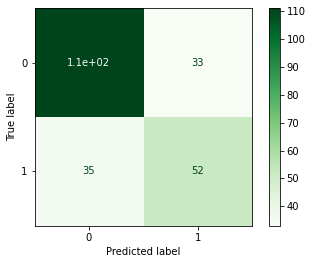

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
cm= confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
plot_confusion_matrix(classifier, X_test, y_test,cmap='Greens')  
plt.show()

In [76]:
print('{:.2f}%'.format(score_cross_val.mean()*100))

75.41%


In [77]:
try:
  import alibi
except:

  !pip install alibi 
  import alibi


Alibi is an open source Python library aimed at machine learning model inspection and interpretation. The focus of the library is to provide high-quality implementations of black-box, white-box, local and global explanation methods for classification and regression models.
Alibi contains many explainers such as Anchors

In [79]:
from alibi.explainers import AnchorTabular


#lambda function to predict the instance we want using xgboost classifier
predict_fn = lambda x: classifier.predict_proba(x)

#Create an explainer, give as arguements the prediction function and name of the features
explainer = AnchorTabular(predict_fn, feature_columns)
#train the explainer
explainer.fit(X_train)



class_names= ['Not Diabetic', 'Diabetic']

idx = 49
#use the explaine.predictor to predict the result 
predicted=y[explainer.predictor(X_test[idx].reshape(1, -1))[0]]
print(predicted)# predicted 0 which means is the Not diabetic class

print('Prediction: ',class_names[predicted[0]] )

#now we use the explainer to explain an test instance. And the threshold of the precision is 95%
explanation = explainer.explain(X_test[idx], threshold=0.95)

print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)


[0]
Prediction:  Not Diabetic
Anchor: glucose_conc > 117.00 AND age > 29.00 AND diab_pred > 0.60 AND num_preg > 2.00 AND skin > 1.14 AND 115.00 < insulin <= 159.97
Precision: 0.96
Coverage: 0.01
